# Selecting all live projects and fetching end state

We will use monthly snapshots of projects to select following data:
* **df_live**           will contain all projects that were live during scraping the web
* **df_live_after_end** will contain projects stored in df_live but after their termination (scraped in the upcoming period)

In [1]:
import os
import pandas as pd
import json

In [2]:
# all kickstarter files from webrobots.io are stored in following path
path = 'C:\\Users\\Patrik\\Downloads\\webrobots.iokickstarter-datasets\\'
dir_list = os.listdir(path)

# sort directories in chronological order
# each directory contains up to 48 csv files
dir_list.sort()
dir_list

['Kickstarter_2015-11-01T14_09_04_557Z',
 'Kickstarter_2015-12-17T12_09_06_107Z',
 'Kickstarter_2016-01-28T09_15_08_781Z',
 'Kickstarter_2016-03-22T07_41_08_591Z',
 'Kickstarter_2016-04-15T02_09_04_328Z',
 'Kickstarter_2016-05-15T02_04_46_813Z',
 'Kickstarter_2016-06-15T02_04_49_697Z',
 'Kickstarter_2016-07-15T02_04_40_862Z',
 'Kickstarter_2016-08-15T02_04_03_829Z',
 'Kickstarter_2016-09-15T02_04_03_474Z',
 'Kickstarter_2016-10-15T02_04_11_689Z',
 'Kickstarter_2016-11-12T22_20_03_295Z',
 'Kickstarter_2016-12-15T22_20_52_411Z',
 'Kickstarter_2017-01-15T22_21_04_985Z',
 'Kickstarter_2017-02-15T22_22_48_377Z',
 'Kickstarter_2017-03-15T22_20_55_874Z',
 'Kickstarter_2017-04-15T22_21_18_122Z',
 'Kickstarter_2017-05-15T22_21_11_300Z',
 'Kickstarter_2017-06-15T22_20_03_059Z',
 'Kickstarter_2017-07-15T22_20_48_951Z',
 'Kickstarter_2017-08-15T22_20_51_958Z',
 'Kickstarter_2017-09-15T22_20_48_432Z',
 'Kickstarter_2017-10-15T10_20_38_271Z']

In [3]:
len(dir_list)

23

In [4]:
df_live = pd.DataFrame()
df_live_after_end = pd.DataFrame()
csv_count = 0

In [5]:
# for each directory containing csv files
for dir in dir_list:
    print('\n\n>>> DIRECTORY: '+dir)
    csv_list = os.listdir(path+dir)
    csv_count += len(csv_list)
    
    # read every csv
    for csv in csv_list:
        print(csv, end=', ')
        data = pd.read_csv(path+dir+'\\'+csv)
        if (dir == 'Kickstarter_2015-11-01T14_09_04_557Z'):
            data['scraped_at'] = 1446386944 # 11/01/2015 @ 2:09pm (UTC)
        else:
            data['scraped_at'] = os.path.getmtime(path+dir+'\\'+csv)
            
        # fetch data about live projects
        df_live = df_live.append(data[data['state']=='live'], ignore_index=True)
        
        # fetch data about projects marked 'live' in previous periods after their end in following periods
        df_live_after_end = df_live_after_end.append(data[data['state']!='live'], ignore_index=True)
        df_live_after_end = df_live_after_end[df_live_after_end['id'].isin(df_live['id'])]
        
        # we only need the first state after the end of a project
        # so remove all rows that capture chronologically later state of a project
        df_live_after_end.drop_duplicates(subset='id', inplace=True)
        
print('\n\nTotal: ' + str(csv_count) + ' csv files in ' + str(len(dir_list)) + ' directories')



>>> DIRECTORY: Kickstarter_2015-11-01T14_09_04_557Z
Kickstarter.csv, Kickstarter001.csv, Kickstarter002.csv, Kickstarter003.csv, Kickstarter004.csv, Kickstarter005.csv, Kickstarter006.csv, Kickstarter007.csv, Kickstarter008.csv, Kickstarter009.csv, Kickstarter010.csv, Kickstarter011.csv, Kickstarter012.csv, 

>>> DIRECTORY: Kickstarter_2015-12-17T12_09_06_107Z
Kickstarter.csv, Kickstarter001.csv, Kickstarter002.csv, Kickstarter003.csv, Kickstarter004.csv, Kickstarter005.csv, Kickstarter006.csv, Kickstarter007.csv, Kickstarter008.csv, Kickstarter009.csv, Kickstarter010.csv, Kickstarter011.csv, Kickstarter012.csv, Kickstarter013.csv, Kickstarter014.csv, Kickstarter015.csv, Kickstarter016.csv, Kickstarter017.csv, Kickstarter018.csv, Kickstarter019.csv, Kickstarter020.csv, Kickstarter021.csv, Kickstarter022.csv, Kickstarter023.csv, Kickstarter024.csv, Kickstarter025.csv, Kickstarter026.csv, Kickstarter027.csv, Kickstarter028.csv, Kickstarter029.csv, Kickstarter030.csv, Kickstarter031.csv

Kickstarter.csv, Kickstarter001.csv, Kickstarter002.csv, Kickstarter003.csv, Kickstarter004.csv, Kickstarter005.csv, Kickstarter006.csv, Kickstarter007.csv, Kickstarter008.csv, Kickstarter009.csv, Kickstarter010.csv, Kickstarter011.csv, Kickstarter012.csv, Kickstarter013.csv, Kickstarter014.csv, Kickstarter015.csv, Kickstarter016.csv, Kickstarter017.csv, Kickstarter018.csv, Kickstarter019.csv, Kickstarter020.csv, Kickstarter021.csv, Kickstarter022.csv, Kickstarter023.csv, Kickstarter024.csv, Kickstarter025.csv, Kickstarter026.csv, Kickstarter027.csv, Kickstarter028.csv, Kickstarter029.csv, Kickstarter030.csv, Kickstarter031.csv, Kickstarter032.csv, Kickstarter033.csv, Kickstarter034.csv, Kickstarter035.csv, Kickstarter036.csv, Kickstarter037.csv, Kickstarter038.csv, Kickstarter039.csv, Kickstarter040.csv, Kickstarter041.csv, Kickstarter042.csv, Kickstarter043.csv, Kickstarter044.csv, Kickstarter045.csv, Kickstarter046.csv, Kickstarter047.csv, 

>>> DIRECTORY: Kickstarter_2017-08-15T22_

In [6]:
df_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88384 entries, 0 to 88383
Data columns (total 40 columns):
backers_count               88384 non-null int64
blurb                       88384 non-null object
category                    88384 non-null object
converted_pledged_amount    3591 non-null float64
country                     88384 non-null object
created_at                  88384 non-null int64
creator                     88384 non-null object
currency                    88384 non-null object
currency_symbol             88384 non-null object
currency_trailing_code      88384 non-null bool
current_currency            3591 non-null object
deadline                    88384 non-null int64
disable_communication       88384 non-null bool
friends                     1719 non-null object
goal                        88384 non-null float64
id                          88384 non-null int64
is_backing                  1719 non-null object
is_starrable                10652 non-null object
i

In [7]:
df_live_after_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56874 entries, 0 to 56873
Data columns (total 40 columns):
backers_count               56874 non-null int64
blurb                       56872 non-null object
category                    56874 non-null object
converted_pledged_amount    1464 non-null float64
country                     56874 non-null object
created_at                  56874 non-null int64
creator                     56874 non-null object
currency                    56874 non-null object
currency_symbol             56874 non-null object
currency_trailing_code      56874 non-null bool
current_currency            1464 non-null object
deadline                    56874 non-null int64
disable_communication       56874 non-null bool
friends                     3 non-null object
goal                        56874 non-null float64
id                          56874 non-null int64
is_backing                  3 non-null object
is_starrable                4699 non-null object
is_starr

## Adding chosen data from json columns to new columns

During the [exploration](https://github.com/blanarik/kickstarter_success_prediction/blob/master/01_Kickstarter_exploring_data_from_webrobots.io.ipynb) of dataset we have found out that some json columns may contain interesting information. We will add this information into new columns. Remaining information is already in other columns or is not relevant for analysis (e.g. urls).

* from creator:
    * creator_name
* from location:
    * location_is_root
    * location_name
    * location_state
    * location_type
* from category:
    * category_name
    * category_position
    * category_parent

In [14]:
def add_new_columns(df):
    df['creator_name'] = df.apply(lambda x: json.loads(x['creator'])['name'], axis=1)
    
    df['location_is_root'] = df.apply(lambda x: json.loads(x['location'])['is_root'], axis=1)
    df['location_name'] = df.apply(lambda x: json.loads(x['location'])['name'], axis=1)
    df['location_state'] = df.apply(lambda x: json.loads(x['location'])['state'], axis=1)
    df['location_type'] = df.apply(lambda x: json.loads(x['location'])['type'], axis=1)
    
    df['category_name'] = df.apply(lambda x: json.loads(x['category'])['name'], axis=1)
    df['category_position'] = df.apply(lambda x: json.loads(x['category'])['position'], axis=1)
    df['category_parent'] = df.apply(lambda x: json.loads(x['category'])['slug'].split('/')[0], axis=1)

In [28]:
add_new_columns(df_live)
add_new_columns(df_live_after_end)

In [27]:
df_live['category_parent'].value_counts()

games           11475
technology      11446
film & video    11018
design          10460
publishing       9119
music            7517
fashion          6959
food             5403
art              4752
comics           3148
photography      1867
crafts           1702
theater          1624
journalism       1290
dance             604
Name: category_parent, dtype: int64

In [29]:
df_live_after_end['location_type'].value_counts()

Town             52762
County            1994
Suburb            1479
LocalAdmin         401
Zip                154
Island              72
Miscellaneous        6
Estate               3
Country              3
Name: location_type, dtype: int64

In [30]:
# save datasets
df_live.to_csv('live.csv')
df_live_after_end.to_csv('ended.csv')

# Merging live projects with ended projects

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_live = pd.read_csv('live.csv', encoding='cp1252', index_col=0)
df_ended = pd.read_csv('ended.csv', encoding='cp1252', index_col=0)

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,14,17,18,19,24,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# rename columns in df_ended
df_ended.rename(columns=lambda name: name+'_end', inplace=True)

In [4]:
# merge projects to single dataframe
df_projects = df_live.merge(df_ended, left_on='id', right_on='id_end')
df_projects.sort_index(axis=1, inplace=True)
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65038 entries, 0 to 65037
Data columns (total 96 columns):
backers_count                   65038 non-null int64
backers_count_end               65038 non-null int64
blurb                           65038 non-null object
blurb_end                       65036 non-null object
category                        65038 non-null object
category_end                    65038 non-null object
category_name                   65038 non-null object
category_name_end               65038 non-null object
category_parent                 65038 non-null object
category_parent_end             65038 non-null object
category_position               65038 non-null int64
category_position_end           65038 non-null int64
converted_pledged_amount        0 non-null float64
converted_pledged_amount_end    1701 non-null float64
country                         65038 non-null object
country_end                     65038 non-null object
created_at                      65

## Cleaning merged dataset

In [5]:
# drop duplicate columns
cols_to_drop = []
for col in df_live.columns:
    try:
        (df_projects[col] != df_projects[col+'_end']).value_counts()[True]
    except KeyError:
        cols_to_drop.append(col+'_end')
print('Following columns were dropped:\n' + str(cols_to_drop))
df_projects.drop(cols_to_drop, axis=1, inplace=True)

Following columns were dropped:
['country_end', 'created_at_end', 'currency_end', 'currency_symbol_end', 'currency_trailing_code_end', 'goal_end', 'id_end', 'slug_end', 'location_is_root_end']


In [6]:
# drop columns with less than 50% of values
df_projects.dropna(axis=1, thresh=df_projects.shape[0]/2, inplace=True)

In [7]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65038 entries, 0 to 65037
Data columns (total 65 columns):
backers_count                65038 non-null int64
backers_count_end            65038 non-null int64
blurb                        65038 non-null object
blurb_end                    65036 non-null object
category                     65038 non-null object
category_end                 65038 non-null object
category_name                65038 non-null object
category_name_end            65038 non-null object
category_parent              65038 non-null object
category_parent_end          65038 non-null object
category_position            65038 non-null int64
category_position_end        65038 non-null int64
country                      65038 non-null object
created_at                   65038 non-null int64
creator                      65038 non-null object
creator_end                  65038 non-null object
creator_name                 65037 non-null object
creator_name_end             

## Resolving inconsistency

#### launched_at

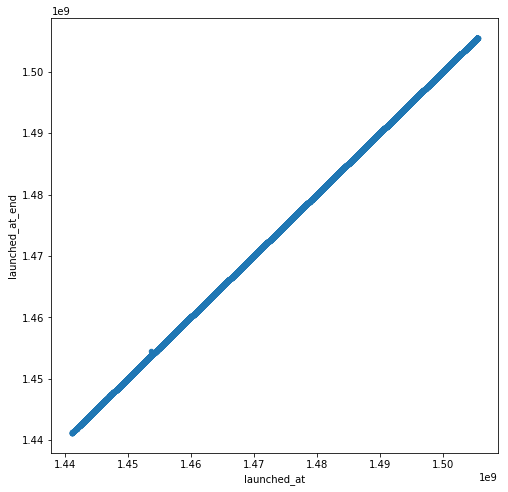

In [9]:
df_projects.plot(x='launched_at', y='launched_at_end', kind='scatter', figsize=(8,8))

In [10]:
# this should not contain True, but it does => inconsistency in dataset
(df_projects['launched_at'] != df_projects['launched_at_end']).value_counts()

False    65037
True         1
dtype: int64

In [11]:
# look at values
df_projects[(df_projects['launched_at'] != df_projects['launched_at_end'])][['id','name','launched_at','launched_at_end']]

,id,name,launched_at,launched_at_end
9271,615482414,"Instant Hydrator, Hydrates,All Natural, Digest...",1453784664,1454537838


In [12]:
# first value is incorrect, drop first column
# https://www.kickstarter.com/projects/1428469449/instant-hydrator-hydratesall-natural-digestive-ph
df_projects.drop('launched_at', axis=1, inplace=True)

#### deadline

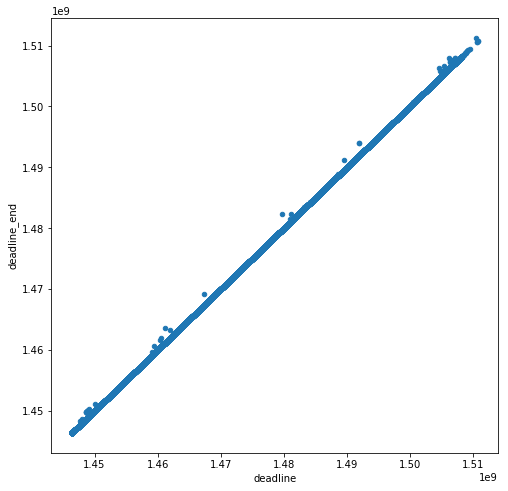

In [13]:
df_projects.plot(x='deadline', y='deadline_end', kind='scatter', figsize=(8,8))

In [14]:
# this should not contain True, but it does => inconsistency in dataset
(df_projects['deadline'] != df_projects['deadline_end']).value_counts()

False    64980
True        58
dtype: int64

In [15]:
# look at values
df_projects[(df_projects['deadline'] != df_projects['deadline_end'])][['id','name','deadline','deadline_end']].head(10)

,id,name,deadline,deadline_end
619,603503453,"The Monsieur Barbier Box : Shaving & Music, Ra...",1448922180,1449613380
633,1495917692,2016 Letterpress Calendar . The creative manif...,1449009780,1449441780
1345,1378352264,Casablancas | The Man Who Loved Women,1449164045,1450287245
1366,1866394158,I Love Therefore I Am - Documentary,1448866800,1449730800
1780,1020745465,SECOND CHANCE - DEUXI?ME CHANCE,1450016445,1451226045
2110,2044197681,Welcome to Another World!,1448018810,1448623610
2284,281156070,Würm : a prehistoric RPG,1449239761,1449671761
2381,174456433,Pur cashmere poncho Workshop,1448756490,1449966090
2415,382060495,Pankapu: the Dreamkeeper,1448621976,1449831576
2487,1401246575,#lanouvelleolympe,1448630040,1449839640


In [16]:
# first values are incorrect again, drop first column
df_projects.drop('deadline', axis=1, inplace=True)

In [17]:
df_projects[df_projects['launched_at_end'] > df_projects['scraped_at']][['name','launched_at_end']]

,name,launched_at_end
241,Totally Mentally Unstable: A Psychedelic Color...,1446388479
249,Waupecony River Studio: Modern Handmade Cerami...,1446389578
639,The Detroit Bikes C-Type: The American Single ...,1446391659
795,Fashion water-repellent clothes - A new standa...,1446388804
1028,Vertical Growth Inc.,1446391164
1173,SICK(er) - A Short Film by Lucy Brydon,1446389767
1237,SAVING BORSHIA,1446390555
1891,Cold November,1446390365
3788,HERO[3] Web Filter Suite - A New Way to Protec...,1446387612
5306,Short film in Japan,1450359213


In [18]:
x = df_projects['scraped_at'] - df_projects['launched_at_end']
x.sort_values()

9271     -555640.0
57147      -5724.0
639        -4715.0
1028       -4220.0
32062      -4047.0
60483      -3853.0
1237       -3611.0
16240      -3496.0
1891       -3421.0
32648      -2988.0
1173       -2823.0
249        -2634.0
53263      -2287.0
23651      -2140.0
7820       -2121.0
16922      -1874.0
795        -1860.0
32013      -1644.0
23916      -1600.0
23638      -1595.0
241        -1535.0
56864      -1331.0
55145       -758.0
3788        -668.0
60343       -456.0
57041       -448.0
5306        -403.0
17000         81.0
30761        136.0
4598         246.0
           ...    
24888    5822114.0
22996    5832820.0
23274    5837829.0
25580    5841351.0
25152    5843580.0
23578    5844847.0
25498    5845477.0
24926    5856802.0
24957    5868127.0
48879    5872488.0
24063    5878145.0
26098    5882407.0
25033    5887761.0
23146    5916576.0
23826    5922224.0
23118    5929893.0
25875    5933903.0
24742    5940167.0
22969    5944628.0
25493    5946414.0
23325    5953561.0
22753    596

In [19]:
df_projects.to_csv('projects.csv')

In [30]:
os.path.getmtime(r'C:\Users\Patrik\Downloads\webrobots.iokickstarter-datasets\Kickstarter_2016-07-15T02_04_40_862Z\Kickstarter.csv')

1469427554.0

In [20]:
df_projects = pd.read_csv('projects.csv', encoding='cp1252', index_col=0)
df_projects.info()

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65038 entries, 0 to 65037
Data columns (total 63 columns):
backers_count                65038 non-null int64
backers_count_end            65038 non-null int64
blurb                        65038 non-null object
blurb_end                    65036 non-null object
category                     65038 non-null object
category_end                 65038 non-null object
category_name                65038 non-null object
category_name_end            65038 non-null object
category_parent              65038 non-null object
category_parent_end          65038 non-null object
category_position            65038 non-null int64
category_position_end        65038 non-null int64
country                      65038 non-null object
created_at                   65038 non-null int64
creator                      65038 non-null object
creator_end                  65038 non-null object
creator_name                 65037 non-null object
creator_name_end             